# Image Scaling With Python and Polynomial Interpolation

Importing necessary libraries

In [1]:
from PIL import Image
import numpy as np
from scipy.interpolate import interp1d

Opening the image tha is needed to be scaled

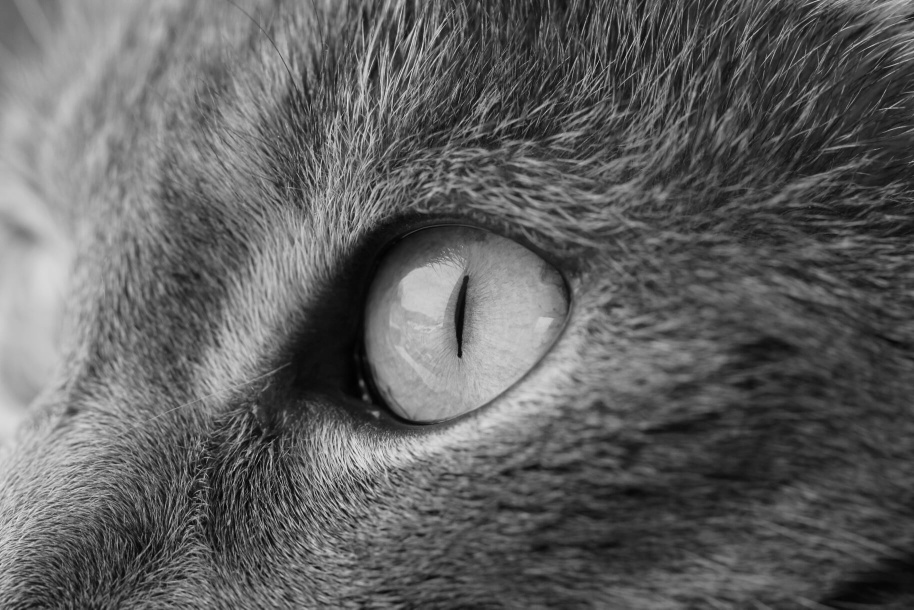

In [2]:
img = Image.open(r'/Users/aram/Downloads/Grayscale_Cat.jpg')
img

Converting the image into a NumPy array

In [3]:
np_img = np.asarray(img)
np_img.shape

(610, 914)

Cropping any part of the image (optional)

In [4]:
cropped_array = np_img[100:500, 200:600]
cropped_image = Image.fromarray(cropped_array)
cropped_array

array([[137, 134, 138, ...,  56,  85,  43],
       [126, 123, 130, ...,  52, 104, 100],
       [122, 113, 108, ..., 119, 146, 110],
       ...,
       [112,  68,  94, ...,  28,  27,  28],
       [ 70,  72,  97, ...,  33,  32,  31],
       [126,  93,  95, ...,  42,  41,  39]], dtype=uint8)

Creating an array filled with zeros of the desired size for further use

In [5]:
zsize = 10
scaled = np.zeros((cropped_array.shape[0]*zsize, cropped_array.shape[1]*zsize))
scaled.shape

(4000, 4000)

Filling the zeros array from cropped aray leaving equal blank spaces (spaces are dependent of the scaling size)

In [6]:
for i in range(cropped_array.shape[0]):
    for j in range(cropped_array.shape[1]):
        scaled[zsize*i][zsize*j] = cropped_array[i][j]

Filling each n-th empty row using polynomial interpolation (n is dependent of the scaling size)

In [7]:
for i in range(cropped_array.shape[0]):
    for j in range(cropped_array.shape[0]-1):
        y1 = scaled[i*zsize][j * zsize]
        yn = scaled[i*zsize][j * zsize + zsize]
        poly = interp1d([1, zsize + 1],[y1, yn])
        y = poly(range(1,zsize))
        for k in range(1, zsize):
            scaled[i*zsize][j * zsize + k] = y[k-1]

Filling the rest using polynomial interpolation

In [8]:
for i in range(scaled.shape[0] - zsize - 1):
    for j in range(cropped_array.shape[0]-1):
        y1 = scaled[j * zsize][i]
        yn = scaled[j * zsize + zsize][i]
        poly = interp1d([1, zsize + 1],[y1, yn])
        y = poly(range(1,zsize))
        for k in range(1, zsize):
            scaled[j*zsize + k][i] = y[k-1]
scaled_img = Image.fromarray(scaled)
scaled_img.show()